<i>Tomasz Kurcoń Grupa 3</i>
# Interpolacja

## Treść zadania
Dla jednej z poniższych funkcji (podanej w zadaniu indywidualnym) wyznacz dla zagadnienia
Lagrange’a wielomian interpolujący w postaci Lagrange’a i Newtona.
Interpolację przeprowadź dla różnej liczby węzłów (np. n = 3, 4, 5, 7, 10, 15, 20). Dla każdego
przypadku interpolacji porównaj wyniki otrzymane dla różnego rozmieszczenia węzłów:
równoodległe oraz Czebyszewa*.
Oceń dokładność, z jaką wielomian przybliża zadaną funkcję.
Poszukaj wielomianu, który najlepiej przybliża zadaną funkcję.
Wyszukaj stopień wielomianu, dla którego można zauważyć efekt Runge’go (dla równomiernego
rozmieszczenia węzłów). Porównaj z wyznaczonym wielomianem dla węzłów Czebyszewa.


## Informacje techniczne
Zadanie zostało wykonane w języku Python3 na komputerze z systemem Windows 11, procesorem Intel
i7-11800H, 2x8GB pamięci RAM o szybkości 3200MHz.

## Biblioteki
Biblioteki z których korzystałem w zadaniu to:

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from time import time

## Interpolowana funkcja:
$ f(x) = e^{-k \cdot \sin(m \cdot x)} + k \cdot \sin(m \cdot x) - 1 $

gdzie $ k = 4, m = 1, x \in [-4\pi, 3\pi] $

In [24]:
a = -4*math.pi
b = 3*math.pi

## 1. Wstęp
<b>Interpolacja wielomianowa </b> umożliwia wyznaczanie
wzorów przybliżonych stosowanych do obliczania
wartości funkcji w dowolnym punkcie, przy założeniu,
że znane są wartości tej funkcji w skończonej liczbie
punktów.
#### 1.1. Wzór na wielomian interpolacyjny Lagrange'a
\begin{equation}
P_{n}(x) = \sum_{k=0}^{n} f(x_{k})L_{k}(x) \tag{1}
\end{equation}
gdzie $ L_{k}(x) = \prod_{i=0, i \neq k}^{n} \frac{x - x_{i}}{x_{k} - x_{i}} \,, \, x_{0}, x_{1}, ..., x_{n}  $ -
punkty w
których znamy wartości interpolowanej funkcji

<h5> Implementacja algorytmu obliczającego wielomian Lagrange'a </h5>

In [25]:
def lagrange_interpolation(x, y):
    n = len(x) - 1
    m = []
    for i in range(n + 1):
        m_val = 1
        for j in range(n + 1):
            if j == i: continue
            m_val *= (x[i] - x[j])
        m.append(m_val)

    def f(x_arg):
        y_val = 0
        for k in range(n + 1):
            p = 1
            for j in range(n + 1):
                if j == k: continue
                p *= (x_arg - x[j])
            y_val += p * y[k] / m[k]
        return y_val

    return f


Funkcja ```lagrange_interpolation``` otrzymuje na wejściu listę argumentów ```x``` i listę wartości ```y```
interpolowanej funkcji w tych punktach. Następnie do listy ```m``` są dodawane kolejne obliczane iloczyny znajdujące
się w mianowniku, tak aby nie obliczać ich później za każdym razem od nowa. Zwracana funkcja ```f``` to nasz
wielomian interpolacyjny Lagrange'a obliczany zgodnie z <i>wzorem (1)</i>.


#### 1.2. Wzór na wielomian interpolacyjny Newtona
<h5>A) Dla węzłów leżących w dowolnych punktach</h5>
Przyjmijmy następujące oznaczenia:
- $f[x_{i}] = f(x_{i}) $ - 0-wy iloraz różnicowy

- $f[x_{i}, x_{i+1},...,x_{i+k}] = \frac{f[x_{i+1}, x_{i+2}, \ldots, x_{i+k}] - f[x_i, x_{i+1}, \ldots,
x_{i+k-1}]}{x_{i+k} - x_i}
$

Wtedy wzór na wielomian Newtona możemy zapisać następująco:
$$ P_n(x) = f[x_0] + (x - x_0)f[x_0, x_1] + \ldots + (x - x_0)(x - x_1)\ldots(x - x_{n-1})f[x_0, \ldots, x_n]
 $$
co możey zapisać w następujący sposób:
$$P_n(x) = f[x_0] + \sum_{k=1}^{n} f[x_0, x_1, \ldots , x_k](x-x_{0}) \ldots(x - x_{k-1}) \tag{2}
 $$
<h5> Implementacja algorytmu obliczającego wielomian Newtona dla węzłów w dowolnych punktach</h5>


In [26]:
def newton_interpolation(x, y):
    n = len(x)
    quoteint_difference_tab = [[y[j] if i == 0 else 0 for i in range(n)] for j in range(n)]
    for j in range(1, n):
        for i in range(j, n):
            quoteint_difference_tab[i][j] = (quoteint_difference_tab[i][j - 1] - quoteint_difference_tab[i - 1][
                j - 1]) / (x[i] - x[i - j])
    factor_tab = [quoteint_difference_tab[i][i] for i in range(n)]

    def f(x_arg):
        result = factor_tab[n - 1]
        for i in range(n - 2, -1, -1):
            result = result * (x_arg - x[i]) + factor_tab[i]
        return result

    return f

 Aby otrzymać wielomian interpolacyjny Newtona budujemy tablicę ilorazów różnicowych. Elementy leżące na jej
przekątnej są kolejnymi współczynnikami wielomianu.
 Wartość wielomianu obliczamy według schematu Hornera. Funkcja ```newton_interpolation(x, y)``` zwraca nam funkcję
```f``` będącą wielomianem interpolacyjnym Newtona.

<h5>B) Dla węzłów równo od siebie oddalonych</h5>
Wprowadzamy następujące oznaczenia:

- $ h = x_{i+1} - x_{i}  \quad   i = 0,1,\ldots,n-1 $
- $ x = x_{0} + s \cdot h $

Wtedy:

$$ P_n(x) = P_n(x_0+sh)=\sum_{k=0}^{n}\binom{s}{k}k!h^kf[x_0,x_1,\ldots,x_k] \tag{3}$$

<b>Różnica progresywna</b>

$ \Delta^{(0)} y_i := y_i $

$ \Delta^{(k)} y_i = \Delta^{(k-1)} y_{i+1} - \Delta^{(k-1)} y_i, \quad k > 1 $

Dla węzłów równoodległych iloraz różnicowy jest równy:

$$ f[x_0, x_1, \ldots , x_k] = \frac{1}{k!h^k} \Delta^k f(x_0) $$

Podstawiając do <i>wzoru (4)<i> otrzymujemy:
$$ P_n(x) = P_n(x_0 + s \cdot h) = \sum_{k=0}^{n} {s \choose k} \Delta^k f(x_0)  \tag{4}$$

<h5> Implementacja algorytmu obliczającego wielomian Newtona dla węzłów równomiernie rozłożonych</h5>


In [27]:
def newton_interpolation_eq(x, y):
    n = len(x)
    h = x[1] - x[0]
    diff_tab = [y[i] for i in range(n)]

    for j in range(1, n):
        for i in range(n - 1, j - 1, -1):
            diff_tab[i] = diff_tab[i] - diff_tab[i - 1]

    def f(x_arg):
        s = (x_arg - x[0]) / h
        result = 0
        for i in range(0, n):
            result += newton_symbol(s, i) * diff_tab[i]
        return result

    return f

Funkcja ```newton_interpolation_eq(x, y)``` oblicza tworzy najpierw listę różnic progresywnych. Następnie wielomian
interpolacyjny newtona jest obliczany zgodnie z <i>wzorem (4)</i> i zwracany jako funkcja ```f```. Funckja
```newton_symbol``` jest funkcją pomocniczą i przedstawiona została poniżej w sekcji <i>Funkcje pomocnicze</i>

<h4>1.3. Funkcje pomocnicze </h4>


In [28]:
def chebyshev_nodes(a, b, n):
    x = []
    for i in range(1, n + 1):
        x.append(0.5 * (a + b) + 0.5 * (b - a) * np.cos((2 * i - 1) / (2 * n) * np.pi))
    return x

Węzły czebyszewa są często używane w interpolacji wielomianowej, ponieważ wynikowy wielomian interpolacyjny
minimalizuje <b>efekt Rungego</b>, czyli duże oscylacje wielomianu interpolacyjnego przy krańcach przedziału.
Obliczane są one zgodnie z następującym wzorem:
$$ x_k = \frac{1}{2} (a+b) + \frac{1}{2} (b-a) \cos\left(\frac{(2k - 1)\pi}{2n}\right), \quad  k = 1,\ldots,n
 \tag{5} $$

Funkcja ```chebyshev_nodes(a, b, n)``` przyjmuje przedział oraz liczbę punktów, które ma zwrócić.


---

In [29]:
def lagrange_interpolation_func(f, a, b, n, chebyshev=False, ax=None):
    if chebyshev:
        x = chebyshev_nodes(a, b, n)
    else:
        x = np.linspace(a, b, n)
    y = [f(xi) for xi in x]
    if ax is not None:
        ax.plot(x, y, 'o', c="r")
    return lagrange_interpolation(x, y)

Funkcja ```lagrange_interpolation_func(f, a, b, n, chebyshev=False)``` przyjmuje funkcję, przedział dla którego ma
wykonać interpolację, liczbę węzłów oraz parametr ```chebyshev``` domyślnie ustawiony na wartość False, określający
czy węzły mają być węzłami Czebyszewa, czy równomiernie rozłożone. Zaznacza na wykresie obliczone węzły i zwraca
wielomian
Lagrange'a

---

In [30]:
def newton_interpolation_func(f, a, b, n, chebyshev=False, ax=None):
    if chebyshev:
        x = chebyshev_nodes(a, b, n)
        y = [f(xi) for xi in x]
        if ax is not None:
            ax.plot(x, y, 'o', c="r")
        return newton_interpolation(x, y)
    else:
        x = np.linspace(a, b, n)
        y = [f(xi) for xi in x]
        if ax is not None:
            ax.plot(x, y, 'o', c="r")
        return newton_interpolation_eq(x, y)

Funkcja ```newton_interpolation_func(f, a, b, n, chebyshev=False)``` jest bardzo podobna do funkcji
```lagrange_interpolation_func(f, a, b, n, chebyshev=False)```. Różnica jest w tym, że dla węzłów Czebyszewa i równo
oddalonych wywołuje różne funkcje do obliczenia wielomianu Newtona - odpowiednio ``` newton_interpolation(x, y)``` i
```newton_interpolation_eq(x, y)```.

---

In [31]:
def newton_symbol(n, k):
    m = 1
    if (n < 0):
        n = k - n - 1
        m = (-1) ** k
    result = 1
    for i in range(k):
        result *= (n - i)
    result /= math.factorial(k)
    return m * result

Funkcja ```newton_symbol(n, k)``` oblicza wartość symbolu newtona.

---
#### 1.4. Wykresy

In [32]:
def data_plot(xs, ys, label=''):
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(xs, ys)
    if label: plt.legend(loc="best")


def func_plot(fn, a, b, n, label='', color='', figsize=(6, 4), subplot=None, title=''):
    if subplot is None:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        ax = subplot
    xs = np.linspace(a, b, num=n)
    ys = [fn(xi) for xi in xs]
    if color:
        ax.plot(xs, ys, label=label, color=color)
    else:
        ax.plot(xs, ys, label=label)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    if label:
        ax.legend(loc="best")
    if title:
        ax.set_title(title)


Funkcje ```data_plot(xs, ys, label='')``` oraz ```func_plot(fn, a, b, n, label='')``` służą do tworzenia wykresów.
<br>

---

#### 1.5. Tabele

In [33]:
def create_compare_errors_table(lagrange_errors, newton_errors):
    data = {"Interpolacja Lagrange'a":lagrange_errors, "Interpolacja Newtona":newton_errors}
    df = pd.DataFrame(data, index=["Błąd bezwzględny", "Błąd średniokwadratowy"])
    return df


---
#### 1.6. Obliczanie błędów
<h5>Błąd bezwzględny</h5>
$\max_{x \in \{x_1, x_2, \ldots, x_n\}} \left| f(x) - W(x) \right|$

In [34]:
def max_absolute_error(f, W, xs):
    return max([abs(f(x) - W(x)) for x in xs])


<h5>Błąd średniokwadratowy</h5>
$ \frac{1}{N} \sum_{x \in \{x_1, x_2, \ldots, x_n\}} (f(x) - W(x))^2
 $


In [49]:
def mse(f, W, xs):
    return sum([(f(x) - W(x)) ** 2 for x in xs]) / len(xs)

---

#### 1.7. Analiza

In [142]:
from IPython.display import Markdown
def interpolation_analysis(f, a, b, n):
    points = 1000;
    xs = np.linspace(a,b, points)
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    L_W_linspace = lagrange_interpolation_func(f,a,b,n, ax=axs[0])
    L_W_chebyshev = lagrange_interpolation_func(f,a,b,n, chebyshev=True, ax=axs[1])
    N_W_linspace = newton_interpolation_func(f,a,b,n, ax=axs[0])
    N_W_chebyshev = newton_interpolation_func(f,a,b,n, chebyshev=True, ax=axs[1])

    L_W_linspace_errors = [max_absolute_error(f, L_W_linspace ,xs), mse(f,L_W_linspace ,xs)]
    N_W_linspace_errors = [max_absolute_error(f, N_W_linspace,xs), mse(f,N_W_linspace ,xs)]

    L_W_chebyshev_errors = [max_absolute_error(f,L_W_chebyshev, xs), mse(f,L_W_chebyshev, xs)]
    N_W_chebyshev_errors  = [max_absolute_error(f,N_W_chebyshev, xs), mse(f,N_W_chebyshev, xs)]



    func_plot(f, a, b, points , label='f', subplot=axs[0], title="Rozkład równomierny")
    func_plot(L_W_linspace, a, b, points , label='Lagrange', subplot=axs[0])
    func_plot(N_W_linspace, a, b, points , label='Newton', subplot=axs[0])
    func_plot(f, a, b, points, label='f', subplot=axs[1], title="Węzły chebysheva")
    func_plot(N_W_chebyshev, a, b, points , label='Newton', subplot=axs[1])
    func_plot(L_W_chebyshev, a, b, points , label='Lagrange',
              subplot=axs[1])
    plt.show()
    display(Markdown("""#### Wartości błędów dla węzłów rozłożonych równomiernie"""))
    display(create_compare_errors_table(L_W_linspace_errors, N_W_linspace_errors))
    display(Markdown("""#### Wartości błędów dla węzłów chebysheva"""))
    display(create_compare_errors_table(L_W_chebyshev_errors, N_W_chebyshev_errors))

def display_interpolation(f, a,b,n, interpolation, label,color=None,chebyshev=False):
    points = 1000
    xs = np.linspace(a,b, points)
    fig, ax = plt.subplots(figsize=(8, 4))
    W = interpolation(f,a,b,n,chebyshev=chebyshev, ax=ax)
    W_errors = [max_absolute_error(f, W ,xs), mse(f,W ,xs)]
    func_plot(f, a, b, 1000, label="f(x)", subplot=ax)
    if color is not None:
        func_plot(W, a, b, 1000, label=label, subplot=ax, color=color)
    else:
        func_plot(W, a, b, 1000, label=label, subplot=ax)

    plt.show()
    data = {label:W_errors}
    df = pd.DataFrame(data, index=["Błąd bezwzględny", "Błąd średniokwadratowy"])
    display(df)

#### 1.8. Pomiar czasu

In [105]:
def display_time(sec):
    hours = int(sec // 3600)
    minutes = int((sec % 3600) // 60)
    seconds = int(sec % 60)
    print(f"Czas trwania algorytmu: {hours} godzin {minutes} minut {seconds} sekund")

## 2. Opracowanie
Przypomijmy jeszcze raz wzór naszej interpolowanej funkcji:
$ f(x) = e^{-k \cdot \sin(m \cdot x)} + k \cdot \sin(m \cdot x) - 1 $, gdzie $ k = 4, m = 1, x \in [-4\pi, 3\pi] $


In [4]:
f = lambda x, k=4, m=1: math.exp(-k * math.sin(m * x)) + k * math.sin(m * x) - 1

#### 2.1. Wykres funkcji $ f(x) $

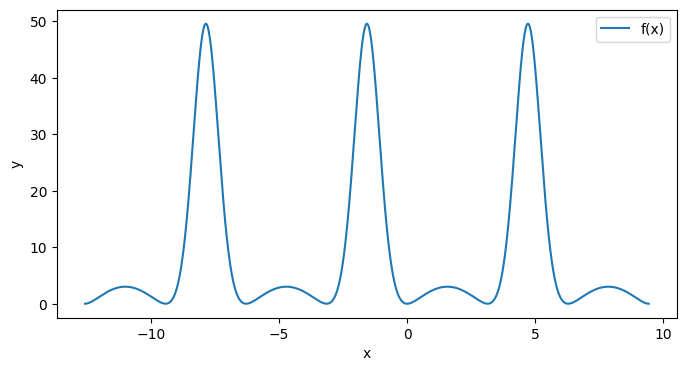

In [38]:
func_plot(f, a, b, 1000, label="f(x)", figsize=(8,4))

#### 2.2. Analiza interpolacji dla różnej ilości węzłów $n$
- $ n = 3 $

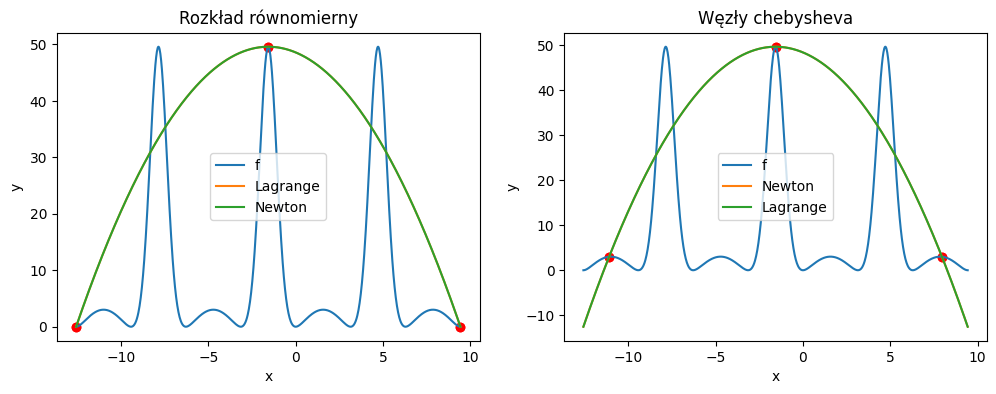

#### Wartości błędów dla węzłów rozłożonych równomiernie

,Interpolacja Lagrange'a,Interpolacja Newtona
Błąd bezwzględny,48.630950,48.630950
Błąd średniokwadratowy,915.558961,915.558961


#### Wartości błędów dla węzłów chebysheva

,Interpolacja Lagrange'a,Interpolacja Newtona
Błąd bezwzględny,48.398904,48.398904
Błąd średniokwadratowy,836.097999,836.097999


In [39]:
interpolation_analysis(f, a,b,3)

---
- $ n = 5 $

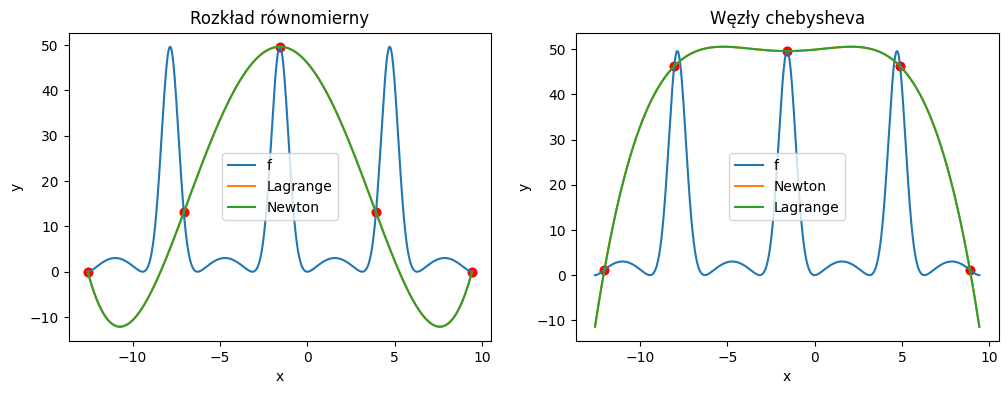

#### Wartości błędów dla węzłów rozłożonych równomiernie

,Interpolacja Lagrange'a,Interpolacja Newtona
Błąd bezwzględny,46.450061,46.450061
Błąd średniokwadratowy,700.744731,700.744731


#### Wartości błędów dla węzłów chebysheva

,Interpolacja Lagrange'a,Interpolacja Newtona
Błąd bezwzględny,50.174660,50.174660
Błąd średniokwadratowy,1281.268523,1281.268523


In [40]:
interpolation_analysis(f, a,b,5)

---
- $ n = 7 $

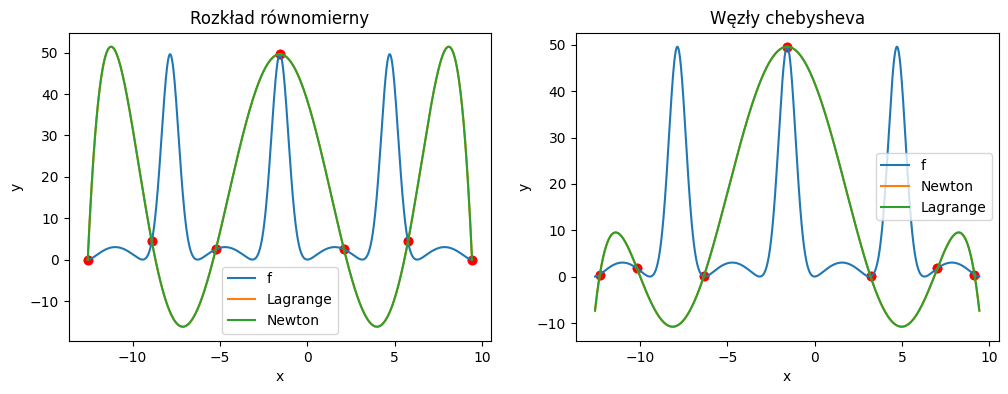

#### Wartości błędów dla węzłów rozłożonych równomiernie

,Interpolacja Lagrange'a,Interpolacja Newtona
Błąd bezwzględny,62.495960,62.495960
Błąd średniokwadratowy,982.758871,982.758871


#### Wartości błędów dla węzłów chebysheva

,Interpolacja Lagrange'a,Interpolacja Newtona
Błąd bezwzględny,60.165672,60.165672
Błąd średniokwadratowy,627.001501,627.001501


In [41]:
interpolation_analysis(f, a,b,7)

<p>Dla  <b>3</b>, <b>5</b> i <b>7</b>  węzłów wielomiany interpolujące zachowują się w oczekiwany przez nas sposób.
</p>

---

- $ n = 8 $

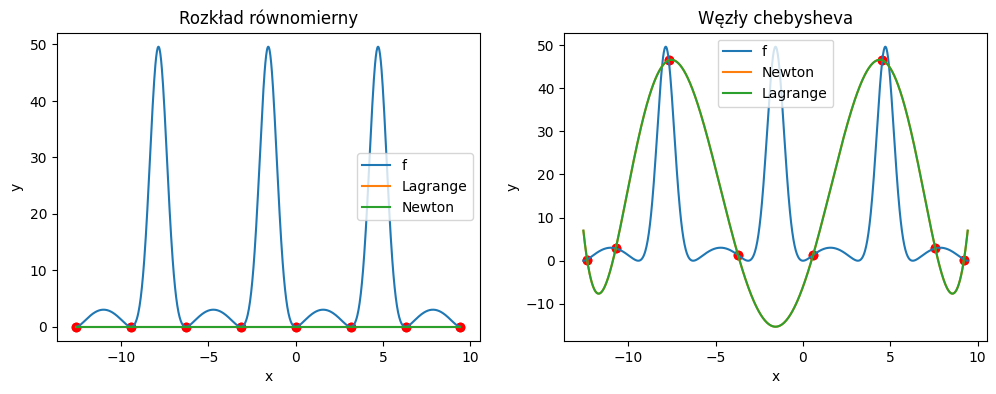

#### Wartości błędów dla węzłów rozłożonych równomiernie

,Interpolacja Lagrange'a,Interpolacja Newtona
Błąd bezwzględny,49.597885,49.597885
Błąd średniokwadratowy,288.186545,288.186545


#### Wartości błędów dla węzłów chebysheva

,Interpolacja Lagrange'a,Interpolacja Newtona
Błąd bezwzględny,64.880089,64.880089
Błąd średniokwadratowy,564.967292,564.967292


In [44]:
interpolation_analysis(f, a,b,8)

<p>Dla 8 węzłów w rozkładzie równomiernym są one wszystkie miejscami zerowymi interpolowanej funkcji, dlatego
wielomian interpolujący to linia prosta o zbiorze wartości $ \{0\}. $</p>

---

- $ n = 9 $

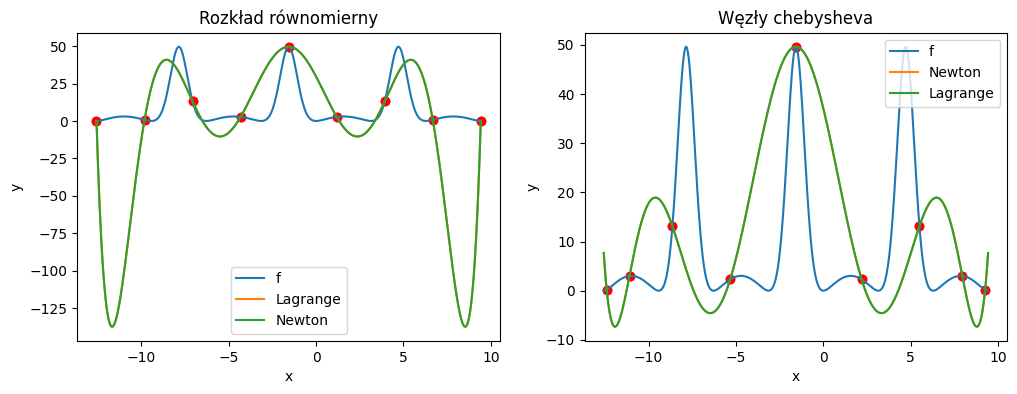

#### Wartości błędów dla węzłów rozłożonych równomiernie

,Interpolacja Lagrange'a,Interpolacja Newtona
Błąd bezwzględny,139.633399,139.633399
Błąd średniokwadratowy,2525.616606,2525.616606


#### Wartości błędów dla węzłów chebysheva

,Interpolacja Lagrange'a,Interpolacja Newtona
Błąd bezwzględny,45.562605,45.562605
Błąd średniokwadratowy,413.418867,413.418867


In [45]:
interpolation_analysis(f, a,b,9)

<p>Dla 9 węzłów możemy zauważyć <b>efekt Runge'go</b> dla równomiernego rozmieszczenia węzłów. Wielomian na krańcach
przedziału zaczyna mieć oscylacje o amplitudzie znacznie odstającej od wartości interpolowanej funkcji. Zaczyna
gwałtownie rosnąć zarówno błąd bezwzględny jak i średniokwadratowy. W przypadku węzłów Czebyszewa ten efekt nie
zachodzi, ponieważ węzły zagęszczają się ku krańcom przedziału, co pozwala lepiej związać wielomian. </p>

---

- $ n = 15 $

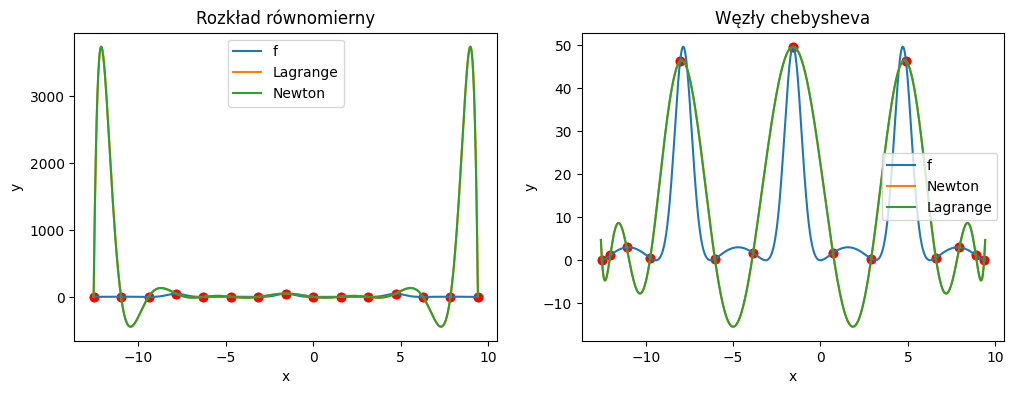

#### Wartości błędów dla węzłów rozłożonych równomiernie

,Interpolacja Lagrange'a,Interpolacja Newtona
Błąd bezwzględny,3737.624763,3737.624763
Błąd średniokwadratowy,856357.166362,856357.166362


#### Wartości błędów dla węzłów chebysheva

,Interpolacja Lagrange'a,Interpolacja Newtona
Błąd bezwzględny,31.992969,31.992969
Błąd średniokwadratowy,206.902563,206.902563


In [46]:
interpolation_analysis(f,a,b,15)

<p>Dla 15 węzłów <b>efekt Runge'go</b> dla równomiernego rozmieszczenia węzłów znacznie się nasila. Wartości przy
krańcach przedziału są na tyle duże, że na wykresie nie jesteśmy w stanie zobaczyć już kształtu funkcji
interpolowanej. Błąd średniokwadratowy jest około <b>339 razy </b> większy niż błąd średniokwadratowy zaobserwowany
dla 9 węzłów. Dla rozmieszczenia zgodnego z węzłami Czebyszewa ten efekt dalej nie występuje, a wielomian
interpolujący z co raz lepszą dokładnością przybliża interpolowaną funkcję.</p>

---

- $ n = 39 $

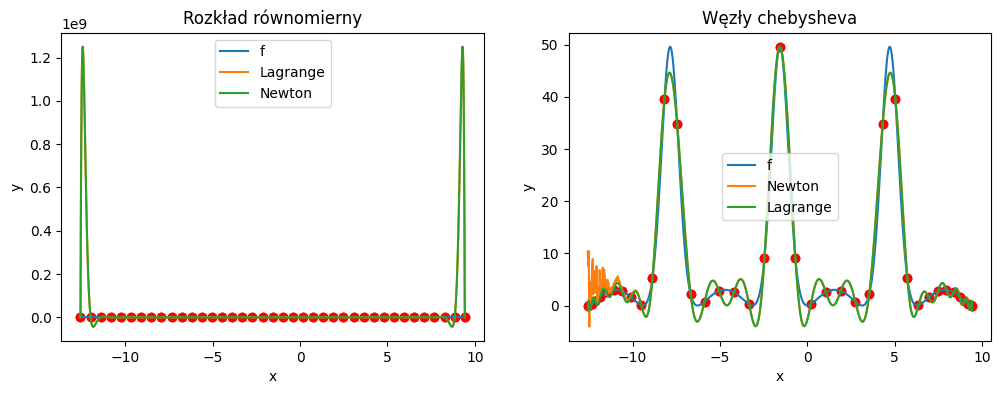

#### Wartości błędów dla węzłów rozłożonych równomiernie

,Interpolacja Lagrange'a,Interpolacja Newtona
Błąd bezwzględny,1.250218e+09,1.250218e+09
Błąd średniokwadratowy,2.950774e+16,2.950774e+16


#### Wartości błędów dla węzłów chebysheva

,Interpolacja Lagrange'a,Interpolacja Newtona
Błąd bezwzględny,5.114861,10.405937
Błąd średniokwadratowy,5.115651,6.006758


In [47]:
interpolation_analysis(f,a,b,39)

<p>Dla <b>39</b> węzłów dla interpolacji z węzłami Czebyszewa po raz pierwszy możemy zauważyć na wykresie różne wartości wielomianów Lagrange'a i
Newtona. Dla tego drugiego zaczynamy obserwować oscylacje o zwiększonej
amplitudzie na lewym krańcu przedziału, przez co przybliżenie funkcji interpolowanej staje się co raz mniej dokładne.
 .</p>

---

- $ n = 50 $

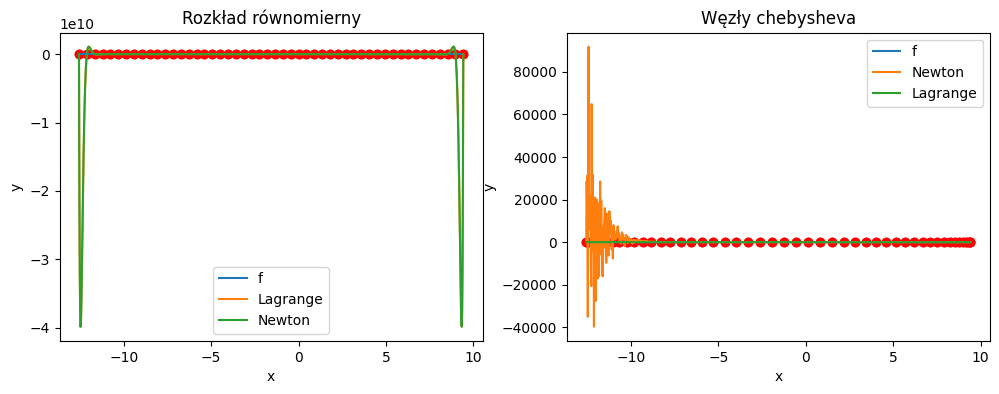

#### Wartości błędów dla węzłów rozłożonych równomiernie

,Interpolacja Lagrange'a,Interpolacja Newtona
Błąd bezwzględny,3.987911e+10,3.987911e+10
Błąd średniokwadratowy,2.254578e+19,2.254552e+19


#### Wartości błędów dla węzłów chebysheva

,Interpolacja Lagrange'a,Interpolacja Newtona
Błąd bezwzględny,3.211612,9.181355e+04
Błąd średniokwadratowy,0.594995,3.148387e+07


In [48]:
interpolation_analysis(f,a,b,50)

<p>Dla <b>50</b> węzłów dokładność przybliżenia wielomianem Newtona na lewym krańcu, dla węzłów czebyszewa, drastycznie
 maleje. Błąd bezwzględny i średniokwadratowy jest ogromny. Co ciekawe, wielomian Lagrange'a przybliża funkcje
 interpolowaną z co raz większą dokładnością.  </p>

---

#### 2.3. Wyznaczanie wielomianu najlepiej przybliżającego zadaną funkcje
<p>W celu wyznaczenia wielomianu, który najlepiej przybliża zadaną funkcję, będę sprawdzał wielomiany interpolujące
Newtona i Lagrange'a dla kolejnej liczby węzłów zaczynając od 2 i liczył dla nich błędy średniokwadratowe. Wielomian
z najniższym błędem średniokwadratowym będzie tym najlepiej przybliżającym zadaną funkcję.
</p>

##### 2.3.1. Algorytm realizujący szukanie najlepszego wielomianu

In [118]:
def find_best_polynomial(f, n_max, interpolation, chebyshev=False):
    start_time = time()
    points = 1000
    xs = np.linspace(a,b, points)
    best_n = 2
    min_mse = float('inf')
    for n in range(2, n_max+1):
        W = interpolation(f, a, b, n, chebyshev=chebyshev)
        W_mse = mse(f, W, xs)

        if W_mse < min_mse:
            min_mse = W_mse
            best_n = n
    end_time = time()
    display_time(end_time-start_time)
    return best_n


##### 2.3.2. Najlepszy wielomian dla interpolacji Lagrange'a z równomiernym rozkładem punktów

In [119]:
find_best_polynomial(f, 20, lagrange_interpolation_func)

Czas trwania algorytmu: 0 godzin 0 minut 0 sekund


4

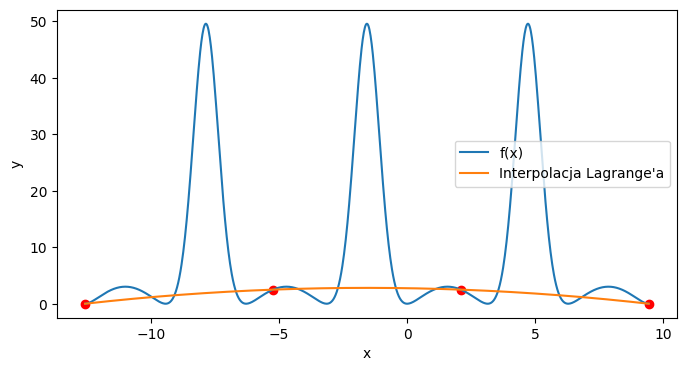

,Interpolacja Lagrange'a
Błąd bezwzględny,47.707694
Błąd średniokwadratowy,253.709635


In [76]:
display_interpolation(f, a, b, 4, lagrange_interpolation_func, label="Interpolacja Lagrange'a")

##### 2.3.3. Najlepszy wielomian dla interpolacji Newtona z równomiernym rozkładem punktów

In [120]:
find_best_polynomial(f, 20, newton_interpolation_func)

Czas trwania algorytmu: 0 godzin 0 minut 0 sekund


4

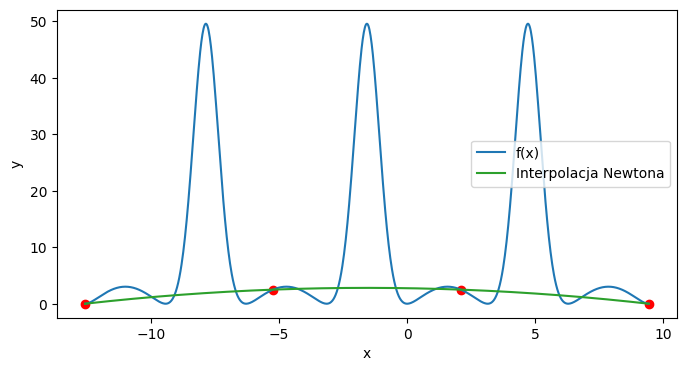

,Interpolacja Newtona
Błąd bezwzględny,47.707694
Błąd średniokwadratowy,253.709635


In [84]:
display_interpolation(f, a, b, 4, newton_interpolation_func, label="Interpolacja Newtona", color="#2ca02c")

<p>Dla rozkładu równomiernego sprawdzałem liczbę węzłów tylko do 20, ponieważ jak mogliśmy już zaobserwować od liczby
węzłów równej 9 pojawia się efekt Runge'go. Nie ma więc sensu sprawdzać dla większej ilości węzłów, gdyż wtedy ten
efekt jest co raz większy.</p>

##### 2.3.4. Najlepszy wielomian dla interpolacji Lagrange'a z węzłami Czebyszewa

In [138]:
find_best_polynomial(f, 350, lagrange_interpolation_func, chebyshev=True)

Czas trwania algorytmu: 0 godzin 33 minut 13 sekund


273

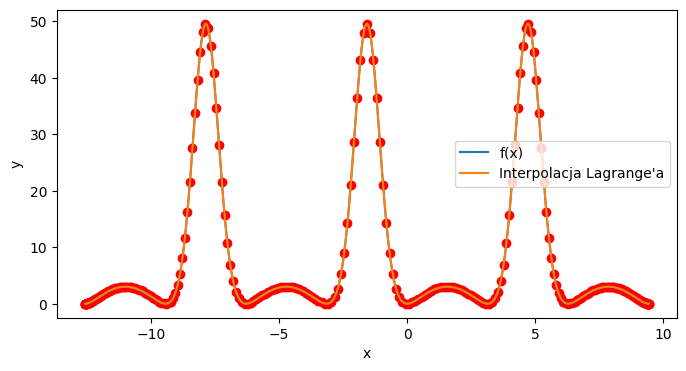

,Interpolacja Lagrange'a
Błąd bezwzględny,1.350031e-13
Błąd średniokwadratowy,4.025563e-28


In [143]:
display_interpolation(f, a, b, 273, lagrange_interpolation_func, label="Interpolacja Lagrange'a", chebyshev=True)

##### 2.3.5. Najlepszy wielomian dla interpolacji Newtona z węzłami Czebyszewa

In [121]:
find_best_polynomial(f, 150, newton_interpolation_func, chebyshev=True)

Czas trwania algorytmu: 0 godzin 0 minut 2 sekund


40

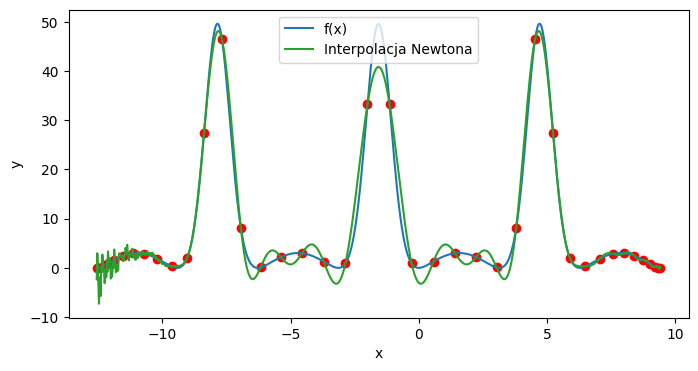

,Interpolacja Newtona
Błąd bezwzględny,8.771602
Błąd średniokwadratowy,4.900118


In [96]:
display_interpolation(f, a, b, 40, newton_interpolation_func, label="Interpolacja Newtona", color="#2ca02c",
                      chebyshev=True)

<p>Okazuje się, że wielomian Newtona o 40 węzłach Czebyszewa najlepiej przybliża interpolowaną funkcję. Zgodnie z tym
 co już zauważyliśmy, od około 39 węzłów dla wielomianu Newtona, zaczynamy obserwować oscylacje o znacznie
 zwiększających się amplitudach na lewym krańcu przedziału. Dla większej ilości węzłów te amplitudy gwałtownie rosną
 i wielomian z mniejszą dokładnością przybliża funkcję interpolowaną.
 </p>

## 3. Wnioski
- Dla równomiernego rozkładu węzłów interpolacji bardzo szybko pojawia się efekt Runge'go, znacznie pogarszający
jakość interpolacji wielomianowej. W naszym wypadku
zaobserwowaliśmy go już od <b>9</b> węzłów.
- Wykorzystanie węzłów Czebyszewa skutecznie minimalizuje efekt Rungego. Dzięki temu, że miejsca zerowe wielomianów
Czebyszewa zagęszczają się ku krańcom przedziału, pozwala lepiej związać wielomian zapobiegając naturalnym dla wielomianów wysokiego rzędu oscylacjom.
- Wielomianem interpolacyjnym, który najlepiej przybliża interpolowaną funkcje, jest wielomian Lagrange'a z węzłami
Czebyszewa dla ... węzłów.
- Ze względu na duży koszt obliczeń wielomian
interpolacyjny Lagrange’a nie znajduje zastosowania w
praktyce. Mogłem się o tym przekonać podczas szukania najlepszego wielomianu, które zajeło aż...
- Dla liczby węzłów większej niż około 40, wielomian interpolacyjny Newtona dla węzłów Czebyszewa zaczyna tracić
dokładność na lewym krańcu przedziału.  Jest to prawdopodobnie spowodowane niedokładnością zapisu liczb zmiennoprzecinkowych w pamięciu komputera i sposobem
  obliczania wartości wielomianu.